In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('..')

model4
0.8033	0.8136	0.8197	0.6069	0.8753
0.7951	0.8214	0.8361	0.5922	0.8815
0.7787	0.7833	0.7869	0.5575	0.8632
0.8197	0.8545	0.8689	0.6425	0.903
0.8197	0.8679	0.8852	0.6449	0.8874
Mean
0.8279	0.8846	0.9016	0.663	0.8952
Sequence Length from 0 to 20
0.8475	0.8611	0.7917	0.6823	0.8631
0.8136	0.8333	0.75	0.6115	0.8619
0.7627	0.7692	0.625	0.5003	0.8607
0.8136	0.8158	0.7083	0.6095	0.8952
0.7797	0.775	0.625	0.5369	0.8893
Mean
0.8305	0.8205	0.7083	0.6461	0.8857
Sequence Length from 20 to 40
0.8163	0.75	0.7308	0.6493	0.9214
0.7959	0.7407	0.7308	0.6024	0.9281
0.7959	0.7407	0.7308	0.6024	0.8729
0.8367	0.8	0.8077	0.6761	0.9431
0.8163	0.7692	0.7692	0.6388	0.9264
Mean
0.7755	0.7143	0.6923	0.5666	0.9398
Sequence Length from 40 to 60
0.8333	0.0	0.9091	-0.0909	0.4545
0.5833	0.0	0.6364	-0.2132	0.2727
0.6667	0.0	0.7273	-0.1741	0.3636
0.5833	0.0	0.6364	-0.2132	0.1818
0.8333	0.0	0.9091	-0.0909	0.2727
Mean
0.75	0.0	0.8182	-0.1348	0.2727


/data/s853wang/ACP/DUO-ACP/notebook/../metric.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1score = 2 * (precision * recall) / (precision + recall)
/data/s853wang/ACP/DUO-ACP/notebook/../metric.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1score = 2 * (precision * recall) / (precision + recall)
/data/s853wang/ACP/DUO-ACP/notebook/../metric.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1score = 2 * (precision * recall) / (precision + recall)
/data/s853wang/ACP/DUO-ACP/notebook/../metric.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1score = 2 * (precision * recall) / (precision + recall)
/data/s853wang/ACP/DUO-ACP/notebook/../metric.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1score = 2 * (precision * recall) / (precision + recall)
/data/s853wang/ACP/DUO-ACP/notebook/../metric.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1score = 2 * (precision *

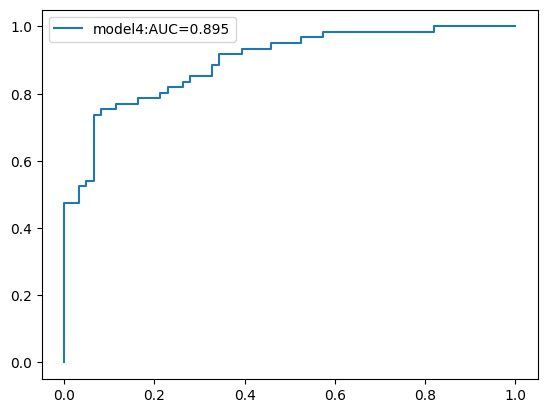

In [3]:
from metric import check_one_set
import matplotlib.pyplot as plt

runtime = '2023-09-25_23-03-03'
plt.figure()
for idx in [4]:
    data_dir = f'../datasets/ACP-Mixed-80/ACP-Mixed-80-test.tsv'
    name = f'model{idx}'
    print(name)
    pkl_path = f'../result/binary/{runtime}/{name}'
    if os.path.exists(pkl_path) == False:
        print(f"{pkl_path} not exists")
        continue
    auroc_val, fpr, tpr = check_one_set(data_dir, pkl_path, show_iter=True, show_length=True, thres=0.8)
    plt.plot(fpr, tpr, label = f'{name}:AUC={round(auroc_val, 3)}')
plt.legend()


In [5]:
import pandas as pd
import pickle
from metric import compute_metric

runtime = '2023-09-25_23-03-03'
data_dir = f'../datasets/ACP-Mixed-80/ACP-Mixed-80-test.tsv'
name = f'model{4}'
pkl_path = f'../result/binary/{runtime}/{name}'
results = sorted(os.listdir(pkl_path))

dataset = pd.read_csv(data_dir, sep='\t')
dataset['seqlen'] = dataset['text'].apply(lambda x: len(x))

for i in range(5):
    pkl_dir = f'{pkl_path}/{results[i]}'
    with open(pkl_dir, 'rb') as fr:
        pkl = pickle.load(fr)
        outputs, labels = pkl
        compute_metric(labels[:, 1], outputs[:, 1], thres=0.8)
    dataset[i] = outputs[:, 1]

column_names = range(5)
averages = dataset[column_names].mean(axis=1)
print('Mean')
auroc_val, fpr, tpr = compute_metric(labels[:, 1], averages, thres=0.8)


0.8033	0.8136	0.8197	0.6069	0.8753
0.7951	0.8214	0.8361	0.5922	0.8815
0.7787	0.7833	0.7869	0.5575	0.8632
0.8197	0.8545	0.8689	0.6425	0.903
0.8197	0.8679	0.8852	0.6449	0.8874
Mean
0.8279	0.8846	0.9016	0.663	0.8952


0.8632088148347219

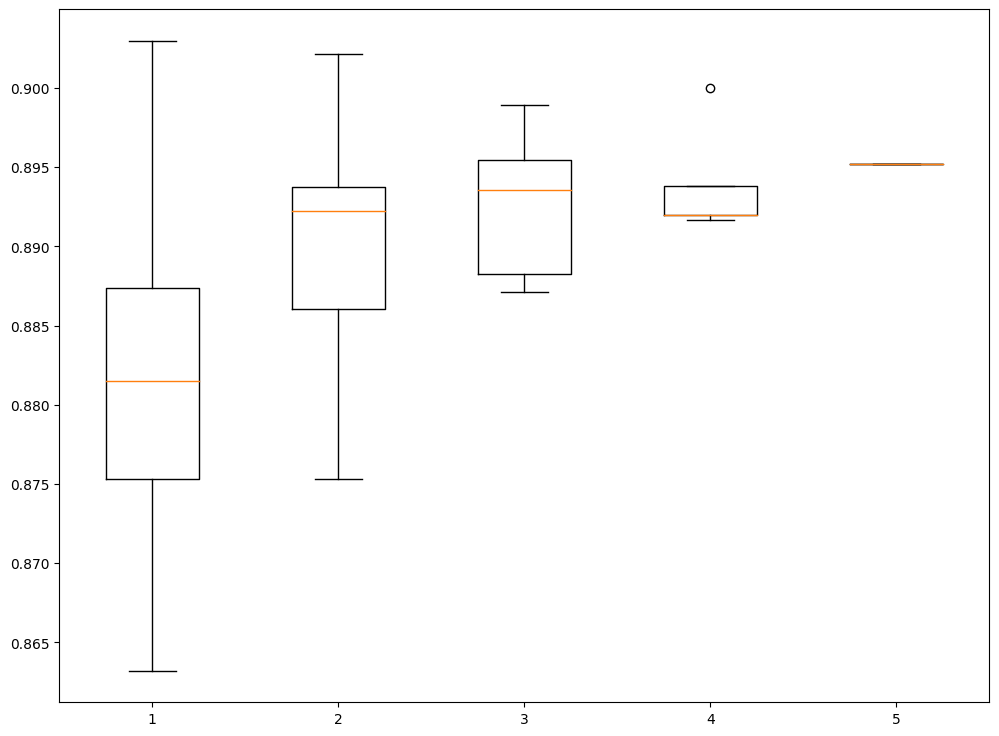

In [20]:
import numpy as np
from itertools import combinations
AUC_list = [[], [], [], [] ,[]]
for i in range(5):
    comb = combinations([0, 1, 2, 3, 4], i + 1)
    for c in comb:
#        print(c)
        averages = dataset[list(c)].mean(axis=1)
        auroc_val, fpr, tpr = compute_metric(labels[:, 1], averages, thres=0.8, show_detail=False)
        AUC_list[i].append(auroc_val)
plt.figure(figsize=(12, 9))
plt.boxplot(AUC_list)
np.min(AUC_list[0])